## How much river carbon is there?

## needs

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import sys
#sys.path.append('/data/tjarniko/MEOPAR/mocsy')
#sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
#import mocsy
import river_201702 as rv
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import arrow

import seawater as sw
#from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import reload
plt.style.use('seaborn-bright')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

## Rivers we have data for and their watersheds

In [14]:

watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    #print('~~')
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        #print('Riv: '+riv+', watershed: '+watshed)
        #swap is, js here
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1

gauge_riv = ['Squamish','SanJuan','Elwha','DungenessMatriotti','Hoko','LittleBigQuilcene',\
            'Duckabush','Skokomish','DeerJohnsGoldboroughMill','Deschutes','Chambers',\
            'Chambers','NisquallyMcAllister','Puyallup','CedarSammamish','Skagit1',\
            'Samish','Stillaguamish1','SnohomishAllenQuilceda','Tulalip','Mission',\
            'Nooksack','Fraser','Oyster','Qunisam','SalmonSayward','Theodosia',
             'Homathko','Cowichan1','Chemanius1','Nanaimo1','Englishman',
             'LittleQualicum','Puntledge']

cols = ['darkgray','red','powderblue','tan','orange',\
    'navy','palegreen','mediumaquamarine','dodgerblue','violet']
watersheds = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']

In [15]:
def wshed_plot(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:
            #print(riv)
            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],label = wsl[wc],marker='o')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
            else:
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
#             elif (tr%2==0):
#                 pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
#                 ax.text(tj-20,ti,riv, weight = 'bold', fontsize = 10)
#             elif (tr%2!=0):
#                 pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
#                 ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
            rc = rc+1
            tr = tr+1
#             print(rc)
#             print(tr)
        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

In [16]:
# print(bath1)

In [17]:
watersheds = rv.prop_dict.keys()

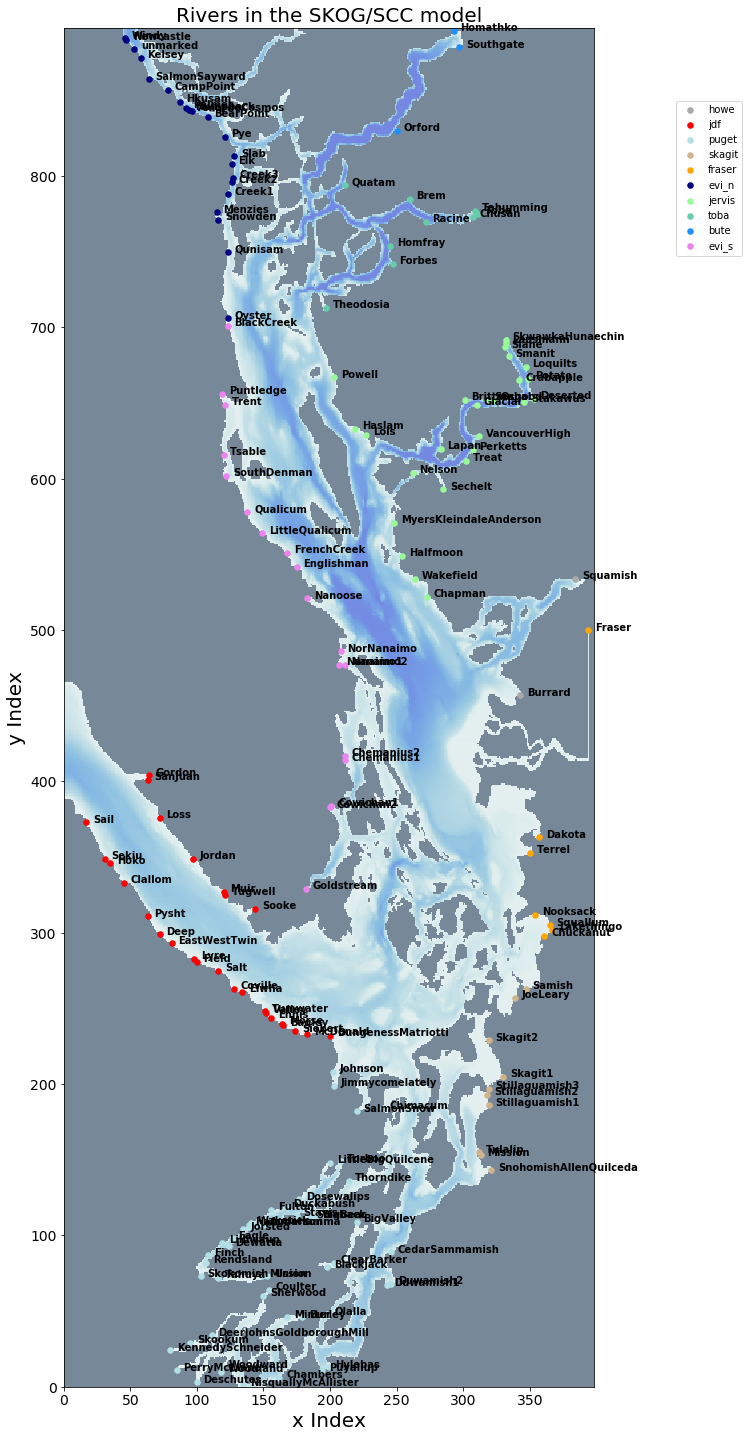

In [18]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']
wshed_plot(bath1,'Rivers in the SKOG/SCC model', \
               cm.cm.dense,15,25,0,1000,'bathymetry','')

In [19]:
def wshed_wtext_gauge(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:
            #print(riv)
            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],label = wsl[wc],marker='o')

            else:
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
            if riv in gauge_riv:
                pts = ax.scatter(tj,ti,s=200,c=cols[wc],marker='*')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 15)

            rc = rc+1
            tr = tr+1

        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

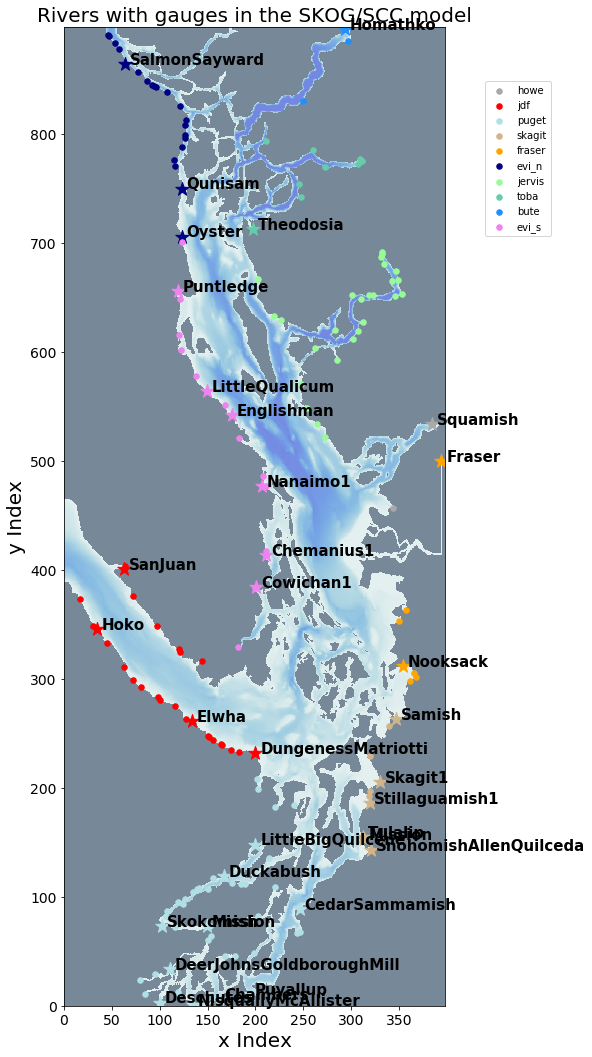

In [20]:
wshed_wtext_gauge(bath1,'Rivers with gauges in the SKOG/SCC model', \
               cm.cm.dense,12,18,0,1000,'bathymetry','')

In [21]:
daylist = [31,29,31,30,31,30,31,31,30,31,30,31]
# mons=[]
mons=np.zeros([1,12])
for i in range(1,12):
    mons[0,i]=sum(daylist[0:i])
    


In [22]:
rivdat = nc.Dataset('/data/tjarniko/MEOPAR/rivers/rivers_month_201702.nc')
t_runoff = rivdat.variables['rorunoff']
print(t_runoff)


test = nc.Dataset('/results/forcing/rivers/R201803DFraCElse_y2017m08d13.nc')
print(test)

<class 'netCDF4._netCDF4.Variable'>
float32 rorunoff(time_counter, y, x)
    units: kg m-2 s-1
    long_name: runoff_flux
unlimited dimensions: time_counter
current shape = (12, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Real Fraser Values, Daily Climatology for Other Rivers
    dimensions(sizes): x(398), y(898), time_counter(1)
    variables(dimensions): float32 time_counter(time_counter), float32 rorunoff(time_counter,y,x)
    groups: 



In [23]:
# daylist = [31,29,31,30,31,30,31,31,30,31,30,31]
# # mons=[]
# mons=np.zeros([1,12])
# for i in range(1,12):
#     mons[0,i]=sum(daylist[0:i])
    
# print(mons)
# mons = mons[0]
# print(mons)

# watersheds = rv.prop_dict.keys()
# riv_i = []
# riv_j = []
# riv_shed = []
# riv_name = []
# i = 0
# for watshed in watersheds:
#     #print('~~')
#     rivs = rv.prop_dict[watshed].keys()
#     for riv in rivs:
#         #print('Riv: '+riv+', watershed: '+watshed)
#         #swap is, js here
#         ti = rv.prop_dict[watshed][riv]['j']
#         tj = rv.prop_dict[watshed][riv]['i']
#         riv_i.append(ti)
#         riv_j.append(tj)
#         riv_shed.append(watshed)
#         riv_name.append(riv)
#         i = i+1
        
# tnc = nc.Dataset('/data/tjarniko/results/SAMPL/SalishSea_1ts_20141121_20141121_grid_T_20141121-20141121.nc')
# runoff_table = np.zeros([171,12])
# rivdat = nc.Dataset('/data/tjarniko/MEOPAR/rivers/rivers_month_201702.nc')
# t_runoff = rivdat.variables['rorunoff']
# riv_runoff_mod = {}
# riv_id = {}
# riv_jd = {}
# riv_runoff_m3 = {}

# #print(t_runoff.shape)
# w = 90
# #print(t_runoff[:,riv_j[w],riv_i[w]])

# #print(t_runoff)
# for r in range(0,len(riv_i)):
    
#     #print(riv_name[r])
#     ti = riv_i[r]
#     #print(ti)
#     tj = riv_j[r]
#     runoff = t_runoff[:,tj,ti]
#     year_runoff = np.zeros([1,366])
#     year_runoff = np.squeeze(year_runoff)
#     runoff_table[r,:]= runoff
#     riv_id[riv_name[r]] = ti
#     riv_jd[riv_name[r]] = tj
#     for i in range (0,11):
#         st = (mons[i])
#         en = (mons[i+1])
#         year_runoff[st:en] = runoff[i]
#     year_runoff[mons[11]:366] = runoff[11]
#     riv_runoff_mod[riv_name[r]] = year_runoff
# #     print(runoff)
#     t_area = (tnc.variables['area'][tj,ti])
    
# #     print(year_runoff)
#     year_runoff2 = (year_runoff / 1000) * t_area
# #     print(year_runoff) 
#     riv_runoff_m3[riv_name[r]] = year_runoff2
    
    
# #     riv_runoff_mod[riv_name[r]] = t_runoff[:,tj,ti]


        
        
# #  Hi Tereza,
# #  I'm not the least surprised that you are confused.  Rivers are treated like rain, added from above.  So kg of water/m2 /s where the m2 is horizontal area.  This we will call nf (nemo flux)

# # So for m3/s first we convert from mass to volume

# # nf / rho (fresh water so 1000 kg/m3)  so now we have m/s

# # Then multiply by the area of the grid cell

# # nf  / rho * e1t(i,j) *e2t(i,j)

# # Cheers,
# # Susan   

In [24]:
#w = '/results/forcing/rivers/R201702DFraCElse_
ro_2015 = np.zeros([365,898,398])

start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
nc_ar = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
for i in range(0,len(arrow_array)):
    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    tstr = f"/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc"
    nc_ar.append(tstr)

for i in range(0,365):
#     if i%20 ==0:
#         print(i)
    t_nc = nc.Dataset(nc_ar[i])
    ro = (np.squeeze(t_nc['rorunoff'][:,:,:]))
    ro_2015[i,:,:] = ro
    
ro_2016 = np.zeros([366,898,398])
start = '2016-01-01'
end = '2016-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
nc_ar = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
for i in range(0,len(arrow_array)):
    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    tstr = f"/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc"
    nc_ar.append(tstr)

for i in range(0,366):
#     if i%20 ==0:
#         print(i)
    t_nc = nc.Dataset(nc_ar[i])
    ro = (np.squeeze(t_nc['rorunoff'][:,:,:]))
    ro_2016[i,:,:] = ro

In [25]:


tnc2 = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
e1t = tnc2.variables['e1t']
e2t = tnc2.variables['e2t']

runoff_m3_15 = np.zeros([len(riv_i),365])
runoff_m3_16 = np.zeros([len(riv_i),366])
for r in range(0,len(riv_i)):
    ti = riv_i[r]
    tj = riv_j[r]
    runoff15 = ro_2015[:,tj,ti]
    year_runoff_use_et15 = (runoff15/ 1000) * e1t[0,tj,ti] *e2t[0,tj,ti]
    runoff_m3_15[r,:] = year_runoff_use_et15
    runoff16 = ro_2016[:,tj,ti]
    year_runoff_use_et16 = (runoff16/ 1000) * e1t[0,tj,ti] *e2t[0,tj,ti]
    runoff_m3_16[r,:] = year_runoff_use_et16
#     runoff16 = ro_2016[:,tj,ti]
#     year_runoff_use_et16 = (runoff16/ 1000) * e1t[0,tj,ti] *e2t[0,tj,ti]


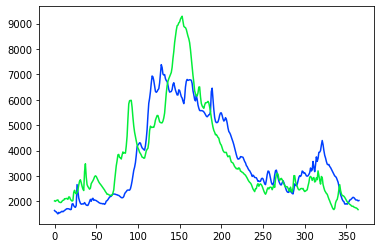

In [26]:
plt.plot(runoff_m3_16[93,:])
plt.plot(runoff_m3_15[93,:])

In [27]:
river_dic_table16 = np.zeros([171,366])
river_dic_table15 = np.zeros([171,365])


for r in range(0,len(riv_i)):
    if r != 93:
        t_runoff15 = runoff_m3_15[r,:]
        t_runoff16 = runoff_m3_16[r,:]
        # m3/ s * mmol/m3 * mol/mmol * 60s/min * 60 min/hr * 24hr/day = mol/day
        
        river_dic_table15[r,:] = t_runoff15 * 660 * (1/1000) * 60 * 60 *24
        river_dic_table16[r,:] = t_runoff16 * 660 * (1/1000) * 60 * 60 *24
        
    if r == 93:
        t_runoff15 = runoff_m3_15[r,:]
        t_runoff16 = runoff_m3_16[r,:]
        # m3/ s * mmol/m3 * mol/mmol * 60s/min * 60 min/hr * 24hr/day = mol/day
        
        river_dic_table15[r,:] = t_runoff15 * 820 * (1/1000) * 60 * 60 *24
        river_dic_table16[r,:] = t_runoff16 * 820 * (1/1000) * 60 * 60 *24

total_dic_rivers15 = np.sum(river_dic_table15,axis = 0)
total_dic_rivers16 = np.sum(river_dic_table16,axis = 0)

cum_dic15 = np.sum(total_dic_rivers15)
cum_dic16 = np.sum(total_dic_rivers16)
print(cum_dic15)
print(cum_dic16)

169114284156.6343
167952654105.16748


In [29]:
print(np.shape(river_dic_table15))

(171, 365)


# monr = np.arange(1,13,1)
fig = plt.figure(figsize=(10,10))
day = np.arange(0,366,1)

for i in range(1,5):
    ax = fig.add_subplot(4,1,i)
    #plt.xlim([0,93])
    if i == 1:
        for r in range(0,len(riv_i)):
            if r != 93:        
                ax.plot(day,river_dic_table[r,:])
        ax.set_title('DIC loading per day - All rivers except Fraser (individually)')
        ax.set_ylabel('DIC mol/day')
    
    if i == 2:
        for r in range(0,len(riv_i)):
            if r == 93:        
                ax.plot(day,river_dic_table[r,:])
        ax.set_title('DIC loading per day - Fraser')
        ax.set_ylabel('DIC mol/day')
                         
    if i == 3:
        total_dic_rivers = np.sum(river_dic_table,axis = 0)
        ax.plot(day,total_dic_rivers - river_dic_table[93,:])

        ax.set_title('cumulative DIC loading per day - All rivers except Fraser')
        ax.set_ylabel('DIC mol/day')

    if i == 4:
        total_dic_rivers = np.sum(river_dic_table,axis = 0)
        ax.plot(day,total_dic_rivers)

        ax.set_title('cumulative DIC loading per day - All rivers')
        ax.set_ylabel('DIC mol/day')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [36]:
# total_dic_rivers = np.sum(river_dic_table15,axis = 0)

# ncname = 'river_dic_table15.nc'
# f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('river_input')
# #g.createDimension('days', len(NO3_mod))
# g.createDimension('days', 366)
# g.createDimension('rivers', 171)
# ts = g.createVariable('river_dic_table','f4',('rivers','days'))
# ts[:] = river_dic_table15

IndexError: size of data array does not conform to slice

In [35]:
# t_rivers = nc.Dataset('river_dic_table15.nc')
# print(t_rivers[:])
# riv_dic_table_fromnc = t_rivers['river_input']['river_dic_table'][:]
# riv_dic_table_fromnc
# monr = np.arange(1,13,1)
# fig = plt.figure(figsize=(10,3))
# day = np.arange(0,366,1)

# for i in range(1,2):
#     ax = fig.add_subplot(1,1,1)
#     total_dic_rivers = np.sum(riv_dic_table_fromnc,axis = 0)
#     ax.plot(day,np.cumsum(total_dic_rivers))

#     ax.set_title('cumulative DIC loading to strait - All rivers')
#     ax.set_ylabel('DIC mol')
#     ax.set_xlabel('yearday')
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

TypeError: expected str, bytes or os.PathLike object, not slice

In [37]:
total_load = np.cumsum(total_dic_rivers)
print(np.shatotal_load)
print(total_load[269])

132293477108.62201


(365,)


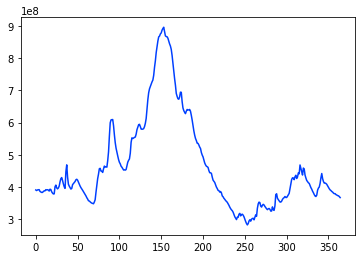

In [40]:
print(np.shape(total_dic_rivers))
plt.plot(total_dic_rivers)